In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        #input-hidden weights
#         self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        #hidden-outoput weights
#         self.who = np.random.rand(self.onodes, self.hnodes) - 0.5
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
                
        #learning rate
        self.lr = learningrate
        
        #activation function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
        
        
        
        
        
#     def train(self, inputs_list, targets_list):
#         #convert inputs list to 2d array
#         inputs = np.array(inputs_list, ndmin=2).T
#         targets = np.array(targets_list, ndmin=2).T
        
#         #calculate singals into hidden layer
#         hidden_inputs = np.dot(self.wih, inputs)
#         hidden_outputs = self.activation_function(hidden_inputs)
        
#         #calculate signals into final output layer
#         final_inputs = np.dot(self.who, hidden_outputs)
#         #calculate the singals emerging from final output layers
#         final_outputs = self.activation_function(final_inputs)
        
#         #final ouptut errors
#         output_errors = targets - final_outputs
        
#         #calculate hidden layers errors
#         hidden_errors = np.dot(self.who.T, output_errors)
        
#         #update the weights of the links between that hidden and output layers
#         self.who += self.lr * np.dot((output_errors*final_outputs*(1.0 - final_outputs)), np.transpose(hidden_outputs))
        
#         #update the weights for the linkes between the input and hidden
#         self.wih += self.lr*np.dot( (hidden_errors*hidden_outputs*(1.0 - hidden_outputs)),  np.transpose(inputs))
#         pass

        
        
         # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    
    
    
    
    
    
#     def query(self, inputs_list):
#         #convert inputs to 2d array
#         #transpose to make them rows instead of columns
#         inputs = np.array(inputs_list, ndmin=2).T

#         #calculate signals into hidden layer
#         hidden_inputs = np.dot(self.wih, inputs)
        
#         #calculate the signals emerging from hidden layers
#         hidden_outputs = self.activation_function(hidden_inputs)
        
        
        
#         #calculate singals into final output layer
#         final_inputs = np.dot(self.who, hidden_outputs)
        
#         #calculate the signals emerginf from the final output
#         final_outputs = self.activation_function(final_inputs)
#         return final_outputs
    
    
    
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
# load the mnist training csv file into a list
training_data_file = open("mnist_dataset/mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [5]:

# train the neural network
# go thru all records in the training data set
for record in training_data_list:
    #split the records by the ',' commas
    all_values = record.split(',')
    
    #scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    #create the target ouput values (all 0.01 except the desired label which is 0.99)
    targets = np.zeros(output_nodes) + 0.01
    #all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass



In [6]:
# load the mnist test data csv 
test_data_file = open("mnist_dataset/mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [7]:
# Test one
all_values = test_data_list[0].split(',')
print(all_values[0])

7


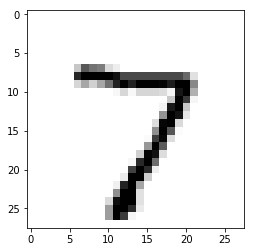

In [8]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation=None)

In [9]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.12504577],
       [0.14619723],
       [0.05267032],
       [0.15244914],
       [0.13657478],
       [0.05017515],
       [0.0441662 ],
       [0.4248872 ],
       [0.12248934],
       [0.0802254 ]])

In [12]:
scorecard = []

# go thru al lthe test records in the test data set
for record in test_data_list:
    all_values = record.split(',')
    
    correct_label = int(all_values[0])
    print(correct_label, "correct_label")
    
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    print(label, "network's answer")
    
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    

7 correct_label
7 network's answer
2 correct_label
3 network's answer
1 correct_label
1 network's answer
0 correct_label
0 network's answer
4 correct_label
4 network's answer
1 correct_label
1 network's answer
4 correct_label
4 network's answer
9 correct_label
1 network's answer
5 correct_label
1 network's answer
9 correct_label
7 network's answer


In [13]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [16]:
# calculate the performance score
scorecard_array = np.asarray(scorecard)
print("performance = {}".format((scorecard_array.sum()/scorecard_array.size)))

performance = 0.6


In [33]:
# Create a new Neural Netowkr and train it with the full dataset
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.2

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [34]:
# Testing with full data set
# training 
# load the mnist training csv file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [35]:

# train the neural network
# go thru all records in the training data set
epochs = 2

for e in range(epochs):
    for record in training_data_list:
        #split the records by the ',' commas
        all_values = record.split(',')

        #scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        #create the target ouput values (all 0.01 except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        #all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass



In [30]:
# Test with full data set
# load the mnist test data csv 
test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [36]:
scorecard = []

# go thru al lthe test records in the test data set
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])    
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)

    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
scorecard_array = np.asarray(scorecard)
print("performance = {}".format((scorecard_array.sum()/scorecard_array.size)))

performance = 0.9585
